# CSCI316 Group Assignment 1
# Task 2
# Group: G18

In [1]:
pip install pandas numpy matplotlib seaborn pyspark scikit-learn jupyter

Note: you may need to restart the kernel to use updated packages.


In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("apartments_for_rent_classified_10K.csv", encoding ="cp1252", sep =';')

df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


### Exploring dataset

In [3]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [4]:
df.isna().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [5]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


### Cleaning and Preprocessing

Dropping unecessary columns

In [6]:
df = df.drop(columns=["price_display"], errors="ignore")
df = df.drop(columns=["id", "source"], errors="ignore")

df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,time
0,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,1577359415
1,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,NaN,425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,1577017063
2,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,1390,Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,1577359410
3,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,1576667743
4,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,1577359401


In [7]:
#one-hot encoding 'cityname'
if "cityname" in df.columns:
    df = pd.get_dummies(df, columns=["cityname"], drop_first=True)

#one-hot encoding pets_allowed
if "pets_allowed" in df.columns:
    df = pd.get_dummies(df, columns=["pets_allowed"], drop_first=True)

df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,price,...,cityname_Yorktown,cityname_Yorkville,cityname_Youngstown,cityname_Youngsville,cityname_Ypsilanti,cityname_Yuba City,cityname_Yukon,cityname_Zachary,"pets_allowed_Cats,Dogs",pets_allowed_Dogs
0,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,790,...,False,False,False,False,False,False,False,False,False,False
1,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,425,...,False,False,False,False,False,False,False,False,False,False
2,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,1390,...,False,False,False,False,False,False,False,False,False,False
3,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,925,...,False,False,False,False,False,False,False,False,False,False
4,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,880,...,False,False,False,False,False,False,False,False,False,False


In [8]:
y = df["price"]
X = df.drop(columns=["price"])

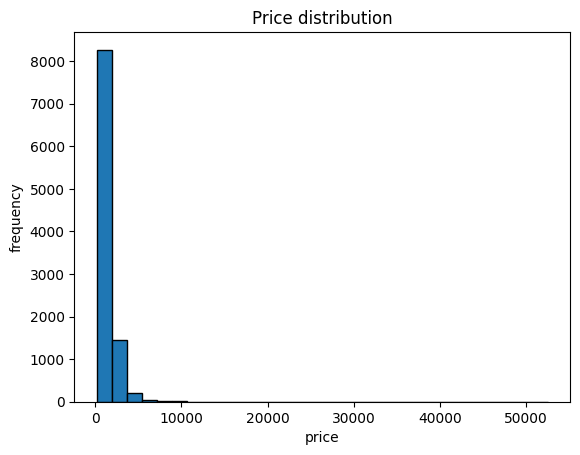

In [9]:
plt.hist(y.dropna(), bins=30, edgecolor="black")
plt.xlabel("price"); plt.ylabel("frequency"); plt.title("Price distribution")
plt.show()

Plotting price (y value) and each feature (x value)

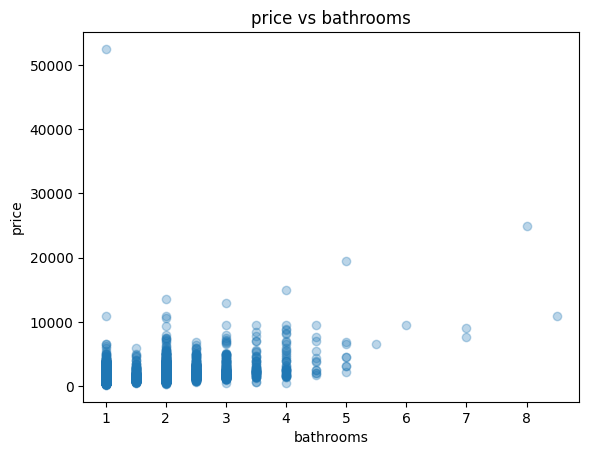

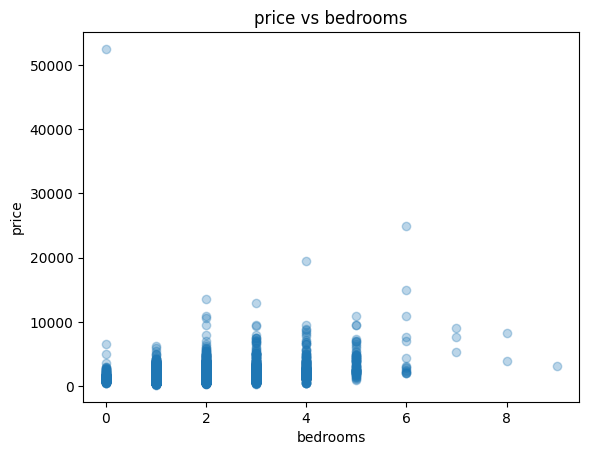

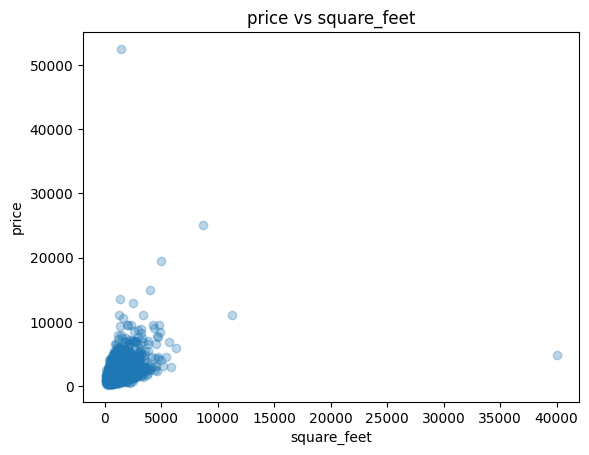

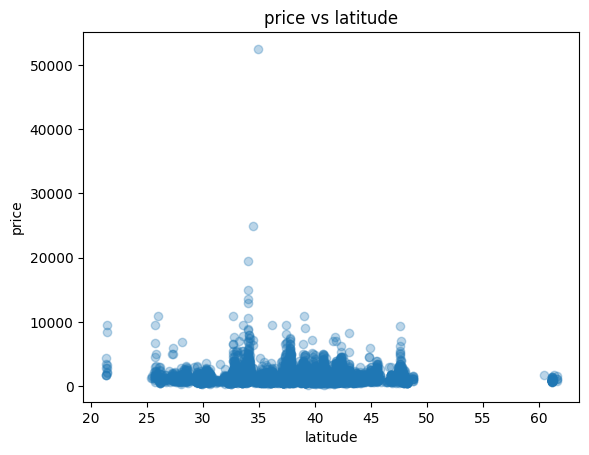

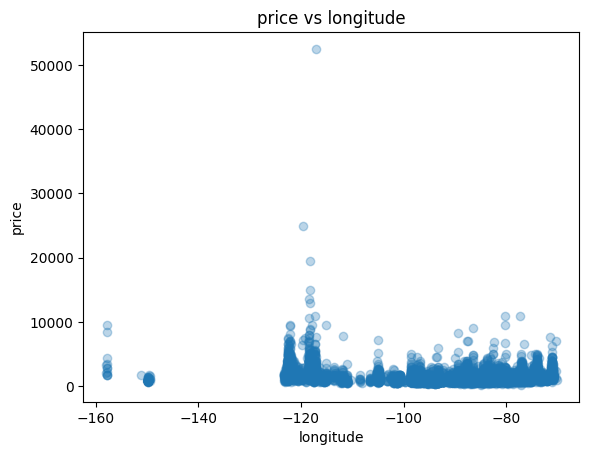

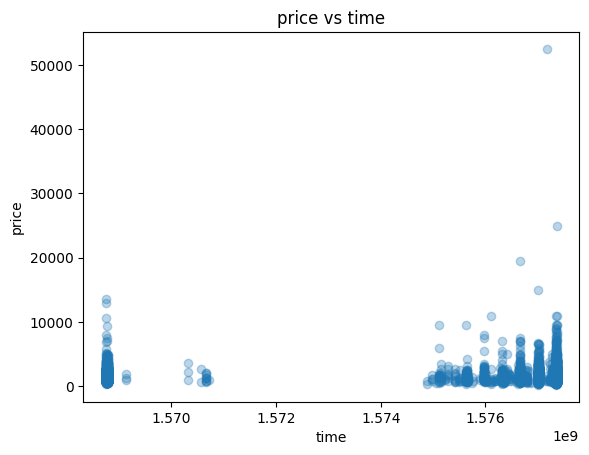

In [10]:
num_cols = X.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.scatter(X[col], y, alpha=0.3)
    plt.xlabel(col); plt.ylabel("price"); plt.title(f"price vs {col}")
    plt.show()

In [11]:
#drop obvious duplicates or irrelevant cols
df = df.drop_duplicates()
df = df.drop(columns=["price_display", "id", "source"], errors="ignore")

#basic NA fixes for common numeric columns
for c in ["bathrooms", "bedrooms"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0).astype(int)

if "square_feet" in df.columns:
    df["square_feet"] = pd.to_numeric(df["square_feet"], errors="coerce")
    df["square_feet"] = df["square_feet"].fillna(df["square_feet"].median())

#target must exist and its not null
df = df[pd.to_numeric(df["price"], errors="coerce").notna()].copy()
df["price"] = pd.to_numeric(df["price"], errors="coerce")

df_plot = df.copy()

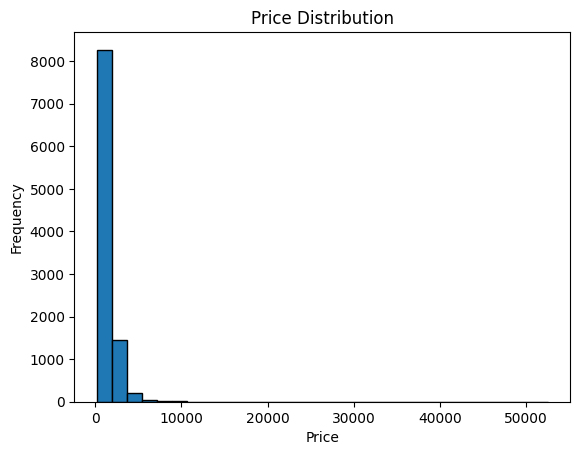

In [12]:
plt.hist(df_plot["price"], bins=30, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

In [ ]:
#choose categorical columns to encode (safe auto-detect)
cat_cols = [c for c in df.columns 
            if df[c].dtype == "object" and c != "description" and c != "address"]

#limit extremely high cardinality columns to top k levels to keep matrix small
def cap_levels(s, top_k=30):
    top = s.value_counts().nlargest(top_k).index
    return np.where(s.isin(top), s, "OTHER")

df_ml = df.copy()
for c in cat_cols:
    df_ml[c] = cap_levels(df_ml[c].astype(str), top_k=30)

#one-hot encode while keeping numeric columns as-is
df_ml = pd.get_dummies(df_ml, columns=cat_cols, drop_first=True)

#final X/y for model
y = df_ml["price"]
X = df_ml.drop(columns=["price"])
X.shape, y.shape

((10000, 1708), (10000,))

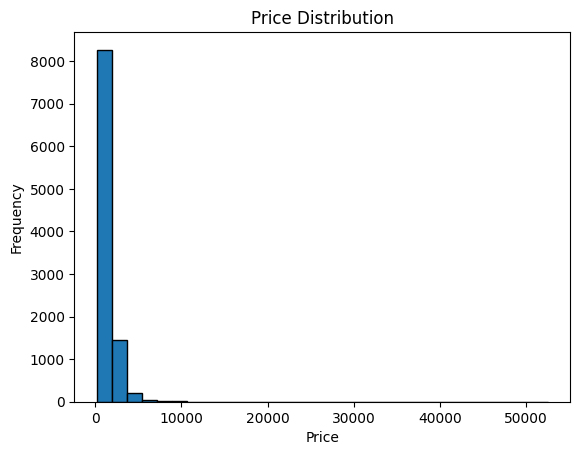

In [14]:
plt.hist(df_plot["price"], bins=30, edgecolor="black")
plt.xlabel("Price"); plt.ylabel("Frequency"); plt.title("Price Distribution")
plt.show()